## Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Orientation Gradient with numpy

In [4]:
gray_img = cv2.imread('images/clock.jpg', 0)
gray_blur = cv2.blur(gray_img, (3,3))


Sobel Filters:

The Sobel method, or Sobel filter, is a gradient-based method that looks for strong changes in the first derivative of an image. The Sobel edge detector uses a pair of 3 × 3 convolution masks, one estimating the gradient in the x-direction and the other in the y-direction.

In [5]:
#Here we will define Sobel filters for edge detection proposes
#Vertical Gradients
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])
#Horizontal Gradients
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

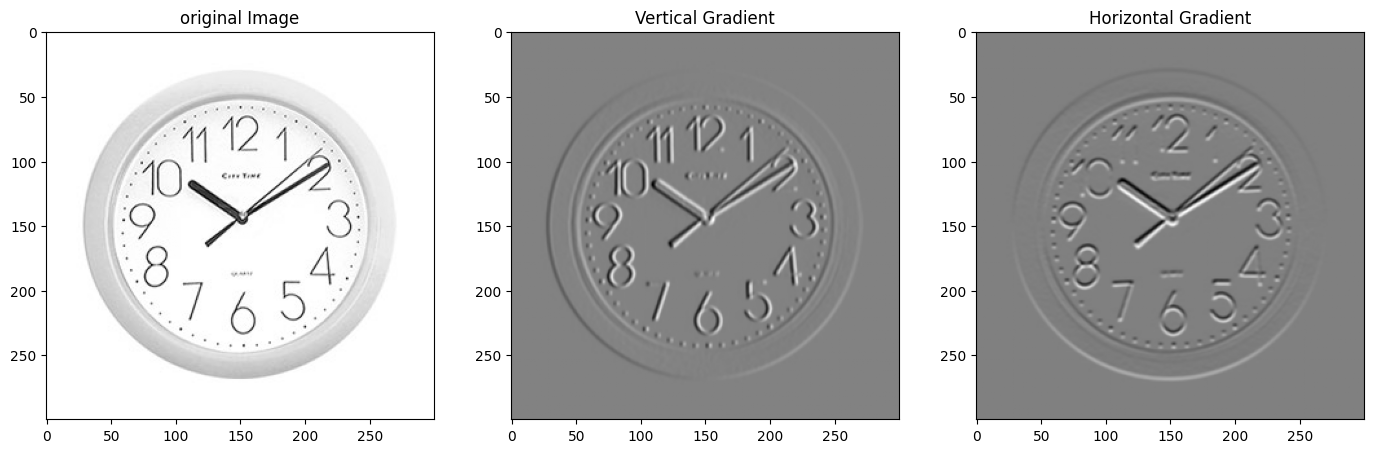

In [6]:
#Now lets try our sobel vertical and horizontal filters aim to detect picture's edges
edges_x = cv2.filter2D(gray_blur, cv2.CV_32F, sobel_x)  #why float 32? because we need directions and they may be minus!
edges_y = cv2.filter2D(gray_blur, cv2.CV_32F, sobel_y)

plt.figure(figsize=[17,8])
plt.subplot(131);plt.imshow(gray_img, cmap='gray');plt.title("original Image");
plt.subplot(132);plt.imshow(edges_x, cmap='gray');plt.title("Vertical Gradient");
plt.subplot(133);plt.imshow(edges_y, cmap='gray');plt.title("Horizontal Gradient");

## Orientation Gradient Rotation Calculation with Phase Function in OpenCV

angle(Image) = atan2(y(Image), x(Image))

In [7]:
orientation = cv2.phase(
    x= np.array(edges_x, np.float32),
    y= np.array(edges_y, np.float32),
    angleInDegrees= True
)

orientation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

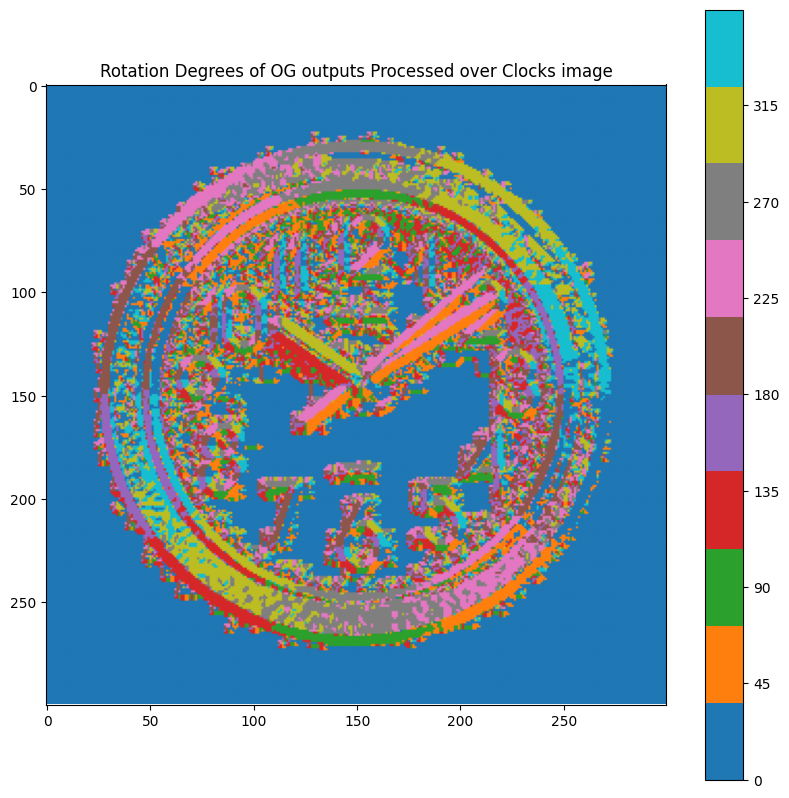

In [9]:
plt.figure(figsize=[10,10])
angle_bounds = np.arange(0, 360, 45)
plt.imshow(orientation , cmap="tab10"), plt.colorbar(ticks = angle_bounds),plt.title("Rotation Degrees of OG outputs Processed over Clocks image") ,plt.show();